In [4]:
print("ola")

ola


In [22]:
from torch import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import torch.optim as otim

#Gerar dados: 100 pontos entre 0 e 10
def convert_celcius_to_farenheit(celcius):
    return (1.8*celcius+32)

temp_celcius = [-10,20,100] 
temp_farenheit = [convert_celcius_to_farenheit(temp)for temp in temp_celcius]
df =pd.DataFrame({"Celsius": temp_celcius, "Farenheit": temp_farenheit})
df

,Celsius,Farenheit
0,-10,14.0
1,20,68.0
2,100,212.0


In [10]:
x = torch.FloatTensor(df.Celsius.values.astype(float))
y = torch.FloatTensor(df.Farenheit.values.astype(float))
y = y.unsqueeze(1)

In [23]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True) # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)   

In [24]:
EPOCHS = 1000
LR = 0.2

In [25]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)

x = x.view(x.size(0),-1) #Reshape x to be a 2D tensor with one column


Peso:1.80 Bias:31.99


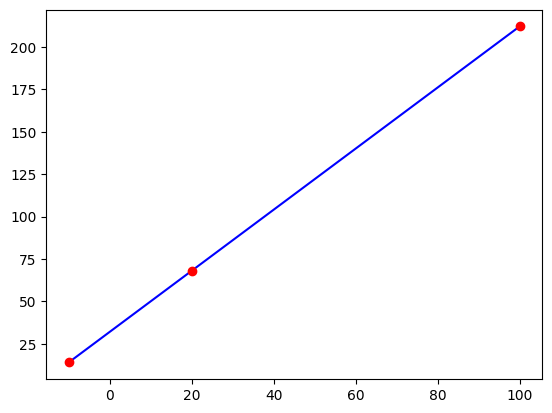

In [26]:
weights = []
biases = []
for epoch in range(EPOCHS):
    outputs = model.forward(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()

    weights.append(model.linear.weight.item())
    #print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}')
    optimizer.step()
    biases.append(model.linear.bias.item())
print(f'Peso:{model.linear.weight.item():.2f} Bias:{model.linear.bias.item():.2f}')
plt.plot(x, y, 'b-', label='Reta de Conversão') # 'b-' representa uma linha azul
plt.plot(temp_celcius, temp_farenheit, 'ro', label='Dados Originais')


In [27]:
training_data = pd.DataFrame({"Pesos": weights, "Bias": biases})
training_data.to_csv("training_data.csv", index=False)

In [29]:
training_data.head()

valor_para_prever = 80

print(f'Valor predito: {model.forward(torch.FloatTensor([valor_para_prever])).item():.2f}F')
print(f'Valor real: {convert_celcius_to_farenheit(valor_para_prever):.2f}F')

Valor predito: 176.00F
Valor real: 176.00F
